In [1]:
from IPython.display import IFrame
IFrame(src="https://www.youtube-nocookie.com/embed/v-s83q9t9Nw", width=1920/4, height=1080/4)
#<iframe width="560" height="315" src="https://www.youtube.com/embed/szdDfF796xg" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [2]:
# pip install qiskit-ibmq-provider
# pip install qiskit-ibm-provider

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()

# Save an IBM Cloud account.
#QiskitRuntimeService.save_account(channel="ibm_cloud", token="MY_IBM_CLOUD_API_KEY", instance="MY_IBM_CLOUD_CRN")

# Save an IBM Quantum account.
#QiskitRuntimeService.save_account(channel="ibm_quantum", token="token")

In [13]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options, Estimator
from qiskit import QuantumCircuit
from qiskit.circuit.library import RealAmplitudes
from qiskit.quantum_info import SparsePauliOp

service = QiskitRuntimeService()
options = Options(optimization_level=1)
options.execution.shots = 1024  # Options can be set using auto-complete.

psi1 = RealAmplitudes(num_qubits=2, reps=2)
H1 = SparsePauliOp.from_list([("II", 1), ("IZ", 2), ("XI", 3)])
theta1 = [0, 1, 1, 2, 3, 5]

with Session(service=service, backend="ibmq_qasm_simulator") as session:
    estimator = Estimator(session=session, options=options)

    # calculate [ <psi1(theta1)|H1|psi1(theta1)> ]
    job = estimator.run(circuits=[psi1], observables=[H1], parameter_values=[theta1])
    print(f"Job ID is {job.job_id()}")
    print(f"Job result is {job.result()}")

Job ID is cfjathvhkg2sste0m0cg
Job result is EstimatorResult(values=array([1.55273438]), metadata=[{'variance': 9.028301239013672, 'shots': 1024, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}])


In [14]:
service.pprint_programs()

hello-world:
  Name: hello-world
  Description: A sample runtime program.
qaoa:
  Name: qaoa
  Description: Qiskit Runtime QAOA program.
torch-train:
  Name: torch-train
  Description: (DEPRECATED) A runtime program to train hybrid QNN models with Pytorch.
torch-infer:
  Name: torch-infer
  Description: (DEPRECATED) A runtime program to run inference and calculate the scores of Hybrid QNN models with Pytorch.
qasm3-runner:
  Name: qasm3-runner
  Description: A runtime program that takes one or more circuits, converts them to OpenQASM3, compiles and executes them. This program can also take and execute one or more OpenQASM3 strings. Note that this program can only run on a backend that supports OpenQASM3.
sampler:
  Name: sampler
  Description: Generates quasi-probabilities by sampling quantum circuits.
estimator:
  Name: estimator
  Description: Calculates expectation values of quantum operators.
sample-expval:
  Name: sample-expval
  Description: (DEPRECATED) A sample expectation valu

In [15]:
print(service.backends())

[<IBMBackend('ibmq_qasm_simulator')>, <IBMBackend('ibmq_lima')>, <IBMBackend('ibmq_belem')>, <IBMBackend('ibmq_quito')>, <IBMBackend('simulator_statevector')>, <IBMBackend('simulator_mps')>, <IBMBackend('simulator_extended_stabilizer')>, <IBMBackend('simulator_stabilizer')>, <IBMBackend('ibmq_manila')>, <IBMBackend('ibm_nairobi')>, <IBMBackend('ibm_oslo')>]


In [17]:
print(service.backend('ibmq_qasm_simulator').coupling_map)

None


In [18]:
print(service.backend('simulator_stabilizer').coupling_map)

None


In [4]:
from qiskit import qasm3

# .loads() from string, .load() to stream from file
circuit = qasm3.loads("""
  OPENQASM 3.0;
  include "stdgates.inc";
  qubit q;
  qubit[3] qr;
  bit c;
  bit[3] cr;
  h q;
  c = measure q;
  if (c) {
    h qr[0];
    cx qr[0], qr[1];
    cx qr[0], qr[2];
  } 
  else {
    h qr[2];
    cx qr[2], qr[1];
    cx qr[2], qr[0];
  }
  cr = measure qr;
  """)

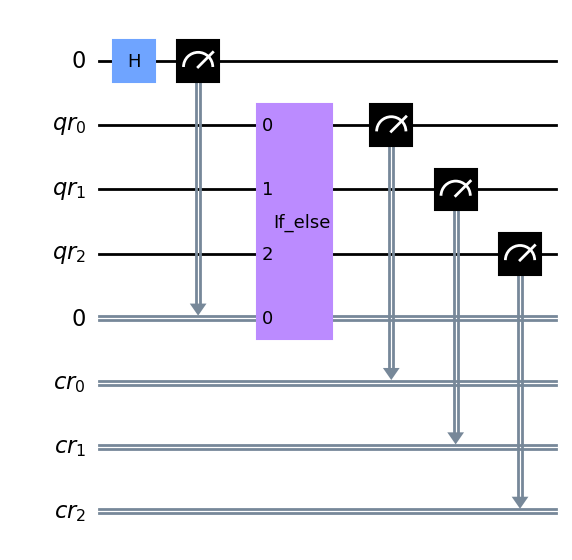

In [5]:
circuit.draw(output='mpl')

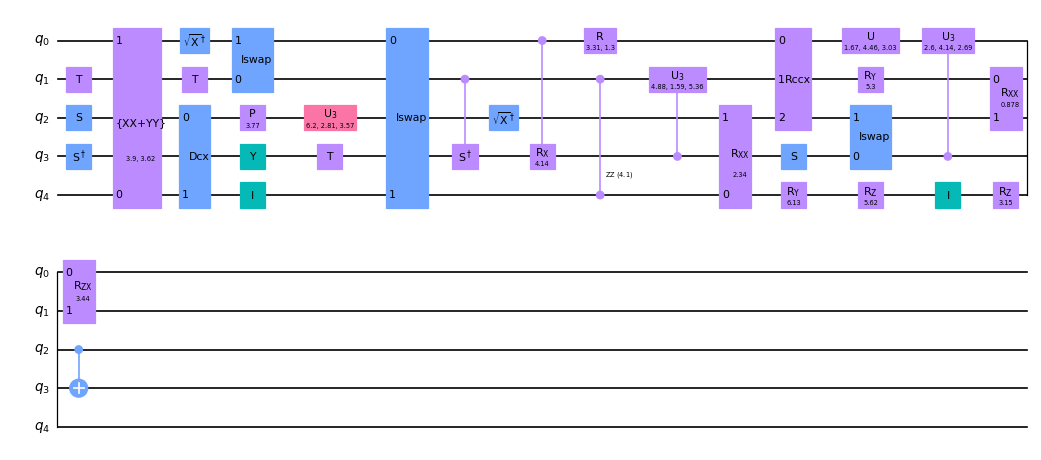

In [6]:
from qiskit.circuit.random import random_circuit
qc = random_circuit(5, 10)
qc.draw(output='mpl', scale=0.6)

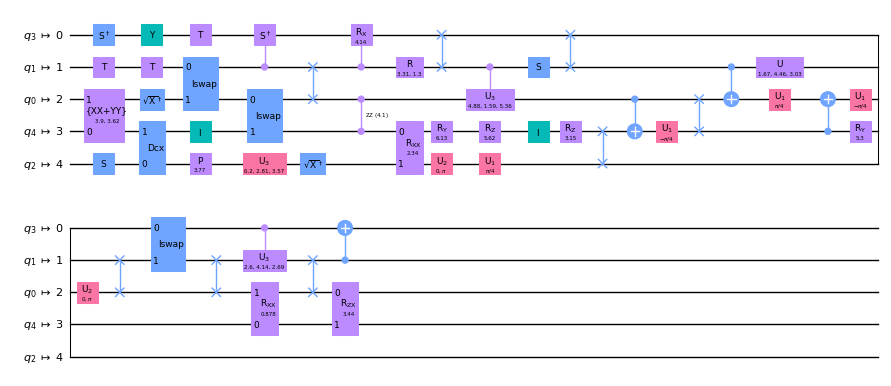

In [7]:
from qiskit.transpiler import CouplingMap, PassManager
from qiskit.transpiler.passes import SabreLayout, Unroll3qOrMore

coupling_map = CouplingMap([[0, 1], [1, 2], [2, 3], [3, 4]])
pm = PassManager([Unroll3qOrMore(), SabreLayout(coupling_map, layout_trials=10)])
qc_l = pm.run(qc)
qc_l.draw(output='mpl', scale=0.5)

In [8]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Clifford, random_clifford
from qiskit.synthesis.clifford import synth_clifford_greedy, synth_clifford_layers

clifford = random_clifford(5, seed=0)
print(clifford)

Clifford: Stabilizer = ['+XYZXZ', '+XZZIY', '-ZZYYI', '+IXYZY', '-YZYXY'], Destabilizer = ['-ZXXIZ', '+IYZII', '-IXXXI', '-IXXII', '-IZYIZ']


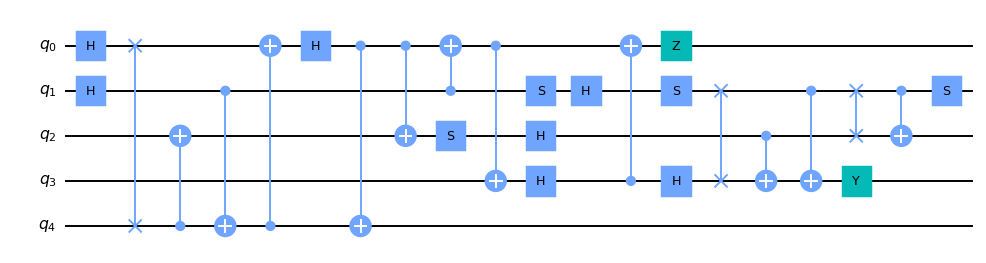

In [9]:
qc = synth_clifford_greedy(clifford)
qc.draw(output='mpl', scale=0.7)

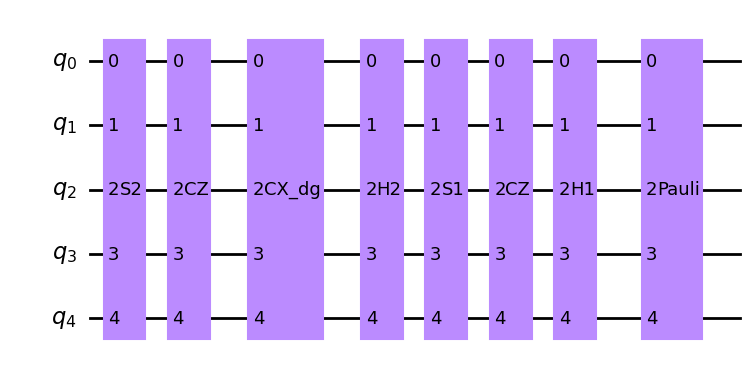

In [10]:
qc = synth_clifford_layers(clifford)
qc.draw(output='mpl', scale=1)

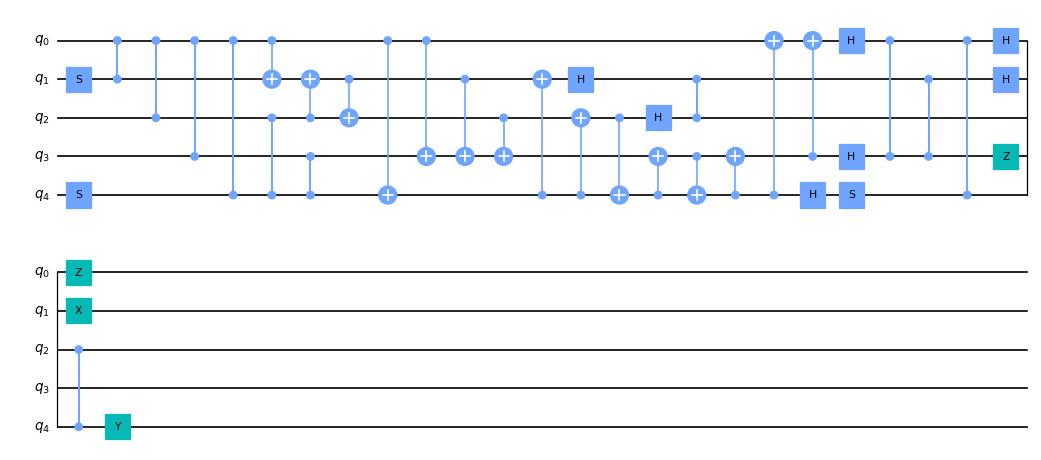

In [11]:
qc.decompose().draw(output='mpl', scale=0.6)

In [19]:
from qiskit.tools.jupyter import *
%qiskit_version_table